<a href="https://colab.research.google.com/github/alondraSanchezM/sequias-en-Mexico-y-agricultura/blob/main/Machine%20Learning/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequías en México: evolución a través de los años e implicaciones en la agricultura.** 




## Identificación del problema



Hoy en día, la sequía es uno de los desastres naturales que más daños está provocando entre la población mexicana, principalmente en la zona norte del país. La sequía es una anomalía climatológica, cuya característica principal es la disminución o ausencia de precipitaciones pluviales respecto al índice anual [[1]](http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-03482014000200008#notas). México es un país susceptible a las sequías gracias a su ubicación geográfica, ya que cerca del 52% del territorio nacional está catalogado como árido o semiárido y aproximademente un cuarto del mismo siempre experimenta algún grado de sequía anualmente [[2]](https://www.redalyc.org/pdf/102/10203402.pdf).

Los datos para la realización de este proyecto fueron obtenidos de:
* North American Drought Monitor (NADM)
* The Food and Agriculture Organization (FAO)
* Datos abiertos de México

Para más información sobre la recolección y limpieza de los datos visite el Jupyter Notebook de [Procesamiento de datos con Python](https://github.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/tree/main/Procesamiento%20de%20datos%20con%20Python).


[1] http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0186-03482014000200008#notas 

[2] https://www.redalyc.org/pdf/102/10203402.pdf

### Descripción del dataset

Este dataset contienen los siguientes datos en un rango de fecha de Noviembre del 2002 a Junio del 2021.	
* Entidad: Representa el nombre de cada uno de los estados de México.
* Fecha: Fecha de la obtención de los datos.
* Temperatura: Temperatura media mensual del estado. 
* Precipitación: Precipitación promedio. 
* D0 - D4:  Porcentaje de área de cada estado que ha sufrido de cada tipo de sequía en la fecha indicada.
* Area_total_afectada_sequias: Área total afectada por algún tipo de sequía.
* IEA: Índice de estrés agrícola en México.


## Importación de librerías

Las librerías que se utilizarán durante todo el proceso se enumeran y se importan a continuación: 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as forest
pd.options.mode.chained_assignment = None  
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objects as go
from urllib.request import urlopen
import json

## Prediciendo Intensidad de las sequías

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv")
df.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


Tratamiento de los datos para predecir con la fecha y entidad

In [ ]:
df = df.dropna()
df['Fecha']=df['Fecha'].astype('datetime64[ns]')
df['Mes']= df['Fecha'].dt.month
df['Año']= df['Fecha'].dt.year
df=df.drop(columns='Fecha')

df.loc[:, 'Entidad'] = df['Entidad'].astype('category')
df_dummy = pd.get_dummies(df.copy(), columns=['Entidad'])

Se define nuestras variables 'x', 'y' y se crean los datasets de prueba y entrenamiento. 

In [ ]:
x=df_dummy.drop(columns="Area_total_afectada_sequias")
y=df_dummy["Area_total_afectada_sequias"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=5)

### Random forest regresor

Genereción de un modelo de random forest

In [ ]:
bosque = forest(n_estimators = 1000, random_state = 0)
bosque.fit(X_train, Y_train)

y_train_predict = bosque.predict(X_train)

Análisis del modelo con MSE y R^2

In [ ]:
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE = "+str(MSE))
print("Entrenamiento: R^2 = "+str(r2_score(Y_train,y_train_predict)))

y_test_predict = bosque.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE = "+str(MSE))
print("Pruebas: R^2 = "+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE = 1.6673177474786014
Entrenamiento: R^2 = 0.9988621345069596
Pruebas: MSE = 10.338928917018173
Pruebas: R^2 = 0.9928250646833524


,valor_real,prediccion,diferencia
0,52.18,54.06733,-1.88733
1,84.59,82.59801,1.99199
2,13.86,13.97993,-0.11993
3,40.13,41.87473,-1.74473
4,96.45,91.85993,4.59007
5,16.46,16.73123,-0.27123
6,100.00,96.70956,3.29044
7,50.71,51.81476,-1.10476
8,99.53,98.92374,0.60626
9,100.00,98.13183,1.86817


Como podemos observar, al testear nuestro modelo obtuvimos valores del error cuadrático medio bajos, 1.66 y 10.33 respectivamente con los datos de training y testing; esto siendo muy bueno ya que cuanto mayor es este valor peor es el modelo. 

Por otro lado, obtuvimos valores de R^2 muy cercanos al 1; teniendo estas dos metricas, podemos decir que el modelo generado es un buen modelo para usar. 

### Validación del modelo

Para visualizar el comportamiento del modelo, realizamos predicciones para el porcentaje de área total afectada usando datos correspondientes a junio de 2021.

In [ ]:
df_predicciones=df_dummy.loc[(df_dummy['Año']==2021) & (df_dummy['Mes']==6)]
y_val=df_predicciones['Area_total_afectada_sequias']
x_val=df_predicciones.drop(columns='Area_total_afectada_sequias')

y_val_predict= bosque.predict(x_val)

In [ ]:
df_resultados=df.loc[(df_dummy['Año']==2021) & (df_dummy['Mes']==6)]
df_resultados['Prediccion']=y_val_predict
df_resultados['Diferencia']=df_resultados['Area_total_afectada_sequias']-df_resultados['Prediccion']
df_resultados.head()

,Entidad,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA,Mes,Año,Prediccion,Diferencia
223,Aguascalientes,19.8,124.1,37.64,3.54,0.00,0.00,0.00,41.18,5.195000,6,2021,40.97403,0.20597
447,Baja California,24.4,0.2,0.43,48.43,51.14,0.00,0.00,100.00,58.889000,6,2021,99.78111,0.21889
895,Campeche,29.2,196.8,0.00,0.00,0.00,0.00,0.00,0.00,1.537000,6,2021,0.00000,0.00000
1119,Chiapas,26.0,319.2,0.00,0.00,0.00,0.00,0.00,0.00,0.149000,6,2021,0.00000,0.00000
1343,Chihuahua,26.5,61.6,26.06,28.40,22.55,14.09,1.51,92.60,20.300333,6,2021,91.36666,1.23334


In [ ]:
df_resultados['Entidad'].unique()

nombres_nuevos = {
    "Yucatan": "Yucatán",
    "San Luis Potosi":"San Luis Potosí",
    "Queretaro":"Querétaro",
    "Nuevo Leon":"Nuevo León",
    "Michoacan":"Michoacán",
    "Ciudad De Mexico":"Ciudad de México",
    "Estado De Mexico":"México"
}
df_resultados['Entidad']=df_resultados['Entidad'].replace(nombres_nuevos)

In [ ]:
with urlopen("https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json"
) as response:
    estados_mexico = json.load(response)

In [ ]:
fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=estados_mexico, ids=df_resultados['Entidad'], z=df_resultados['Prediccion'],
                                locations=df_resultados['Entidad'], featureidkey='properties.name', colorscale='reds', 
                                colorbar_title = "Predicción Junio 2021",
                                text=df_resultados['Diferencia'], hoverinfo=["all"]))

fig.update_layout(mapbox_style='open-street-map',
                  mapbox_zoom=4, 
                  mapbox_center = {'lat': 25, 'lon': -99},
                  title_text = '2016 Presidential Election'
                  
              
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Dentro del mapa, se puede observar el dato de la predicción y abajo  la diferencia respecto al valor real

### Predicción a futuro

In [ ]:
var1 = np.array([[25.600000,0.0,0.0,0.0,0.0,0.0,14.94,60.000000,7,2026,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
pred1 = bosque.predict(var1)
pred1

array([0.3])

El 30% de la zona en Baja California Sur será afectada en 5 años. Baja California Sur es el estado con un mayor índice de estrés agrícola en los últimos [[1]](https://github.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/blob/main/Procesamiento%20de%20datos%20con%20Python/Sequias_Equipo13.ipynb).

In [ ]:
var2 = np.array([[25.600000,0.0,0.0,0.0,0.0,0.0,14.94,60.000000,7,2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]])
pred2 = bosque.predict(var2)
pred2

array([0.50253])

El 50% de la zona en Sonora será afectada el próximo año. Cabe mencionar que Sonora es el estado con mayor porcentaje de área afectada por las sequías [[2]](https://github.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/blob/main/Procesamiento%20de%20datos%20con%20Python/Sequias_Equipo13.ipynb).

## Prediciendo Indice de Estrés Agrícola


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv')
df.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


Como estamos a punto de realizar un modelo ARIMA, es necesario que no hayan "huecos" entre nuestros datos, por ello, realizamos un forward fill. Además,convertimos las fechas a un formato adecuado

In [ ]:
df['IEA'] = df['IEA'].ffill(axis=0)
df['Fecha'] = pd.to_datetime(df['Fecha'], format = '%Y-%m-%d')

Como buscamos predecir el Índice de Estrés Agrícola (IEA), eliminamos el resto de las columnas. 

In [ ]:
df.drop(columns=['D0','D1','D2','D3','D4'], axis=1, inplace=True)
df_total = df
df_completo = df.copy()

cols = ['Entidad', 'Temperatura', 'Precipitacion', 'Area_total_afectada_sequias']
df.drop(cols, axis=1, inplace=True)

Convertimos las fechas en índice del dataframe.

In [ ]:
df = df.set_index('Fecha')
df.index

DatetimeIndex(['2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01',
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01',
               ...
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=7168, freq=None)

### Modelo ARIMA 

#### Nacional

Primero se hará una predicción a nivel nacional, para ello, se obtienen los promedios de los datos por fecha. 

In [ ]:
y = df['IEA'].resample('MS').mean()
y

Fecha
2002-11-01    12.933188
2002-12-01    11.747542
2003-01-01    15.195135
2003-02-01    16.415849
2003-03-01    16.601141
                ...    
2021-02-01    24.221302
2021-03-01    28.145990
2021-04-01    33.906380
2021-05-01    20.577656
2021-06-01     8.168276
Freq: MS, Name: IEA, Length: 224, dtype: float64

Gráficamos la serie en el tiempo. 

Text(0.5, 1.0, 'Índice de Estrés Agrícola: Nacional (2002-2021)')

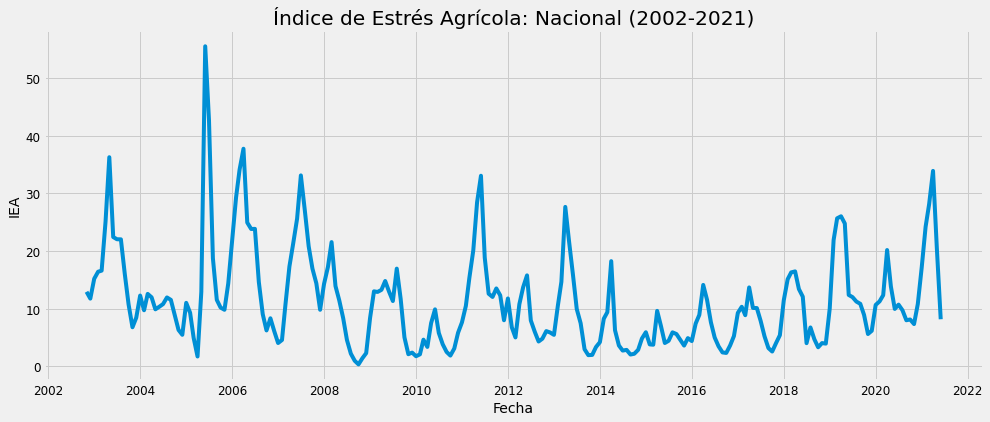

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x=y.index, y=y)
ax.set_title('Índice de Estrés Agrícola: Nacional (2002-2021)')

Realizamos la descomposición de la serie de tiempo en sus 3 componentes: tendencia (trend), estacionalidad (seasonal) y aleatoria (residual). Observamos claramente la estacionalidad de la serie, lo cual es de esperarse porque año con año hay una temporada de sequías. 

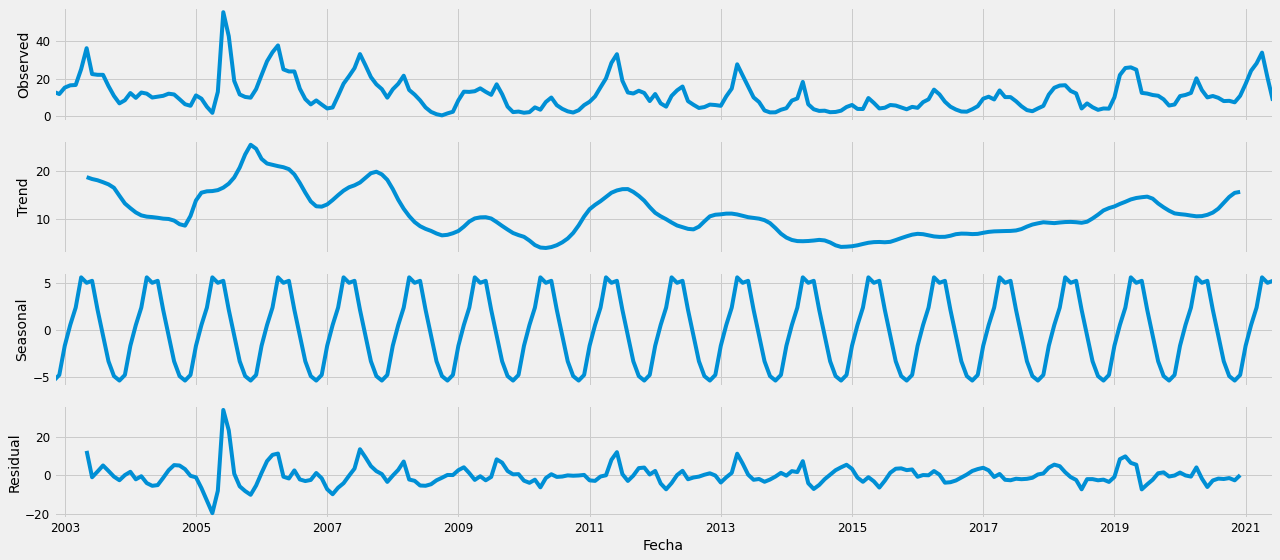

In [ ]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

Para realizar las predicciones o forecasting se utilizará un modelo ARIMA, que está en función de 3 parámetros: p, d y q, los cuales hace referencia a las componentes de la serie de tiempo. 

A continuación buscamos los parámetros adecuados para el modelo utilizando el Criterio de información de Akaike (AIC).

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Ejemplo de parámetros para un modelo ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Ejemplo de parámetros para un modelo ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1817.3753378400456
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1646.0353173508488
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1583.7407519385617
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1388.2761273931992
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1558.5080819317814
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1469.7864572759147
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1404.460439785406
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1387.2026978623314
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1591.4359148277936
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1441.337503090142
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1418.3447872369097
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1248.5482558850595
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1390.2899973112023
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1323.0704268531308
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1288.5541958172864
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1248.2410986902653
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1397.9918030878716
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1314.04397945

El mejor modelo es aquel con los parámetros: `ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1197.599178403284`. Ajustamos el modelo con estos parámetros:

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultados = mod.fit()
print(resultados.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5945      0.061      9.768      0.000       0.475       0.714
ma.L1          0.4406      0.068      6.456      0.000       0.307       0.574
ar.S.L12      -0.0153      0.008     -1.848      0.065      -0.031       0.001
ma.S.L12      -0.7827      0.068    -11.594      0.000      -0.915      -0.650
sigma2        22.4840      1.516     14.828      0.000      19.512      25.456


Gráficamos los resultados:

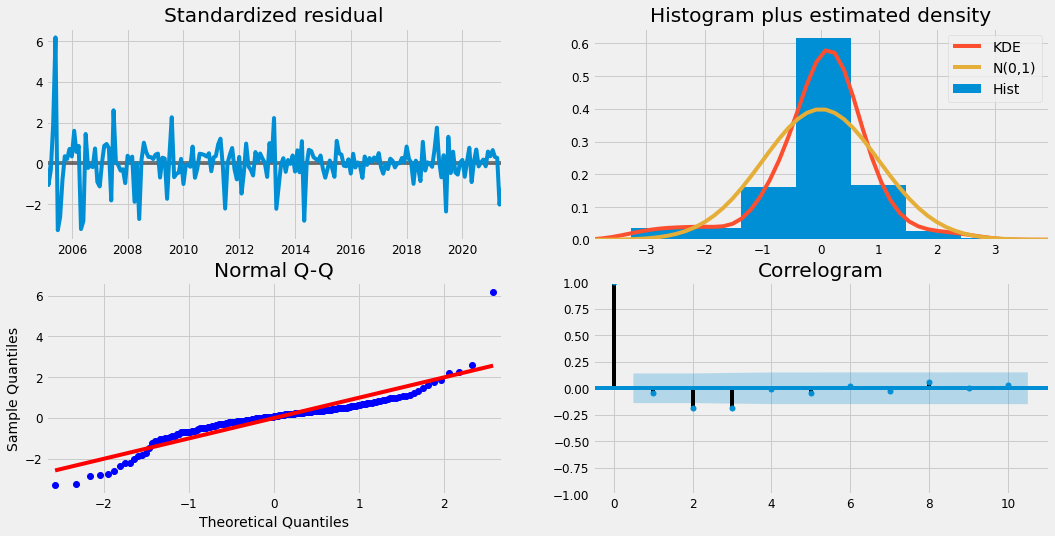

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Ahora, compararemos el ajuste del modelo con los datos originales a partir del año 2012:

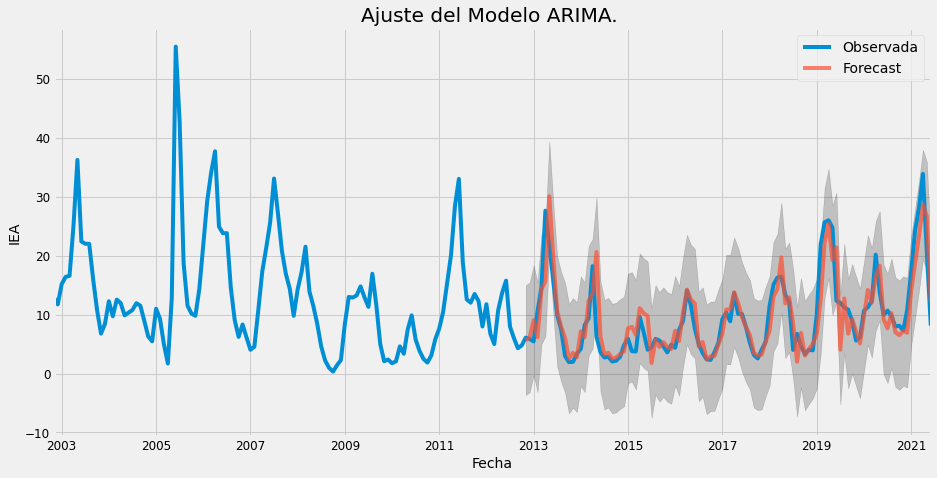

In [ ]:
pred = resultados.get_prediction(start=pd.to_datetime('2012-11-01'), dynamic=False)
# intervalo de confianza
pred_ic = pred.conf_int()
ax = y['2002':].plot(label='Observada')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ic.index,
                pred_ic.iloc[:, 0],
                pred_ic.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Ajuste del Modelo ARIMA. ')
plt.legend()
plt.show()

Obtenemos métricas para validar nuestro modelo:

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2012-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('Error Cuadrático Medio  del modelo: {}'.format(round(mse, 2)))

Error Cuadrático Medio  del modelo: 12.38


In [ ]:
print('Raíz del Error Cuadrático Medio del Modelo: {}'.format(round(np.sqrt(mse), 2)))

Raíz del Error Cuadrático Medio del Modelo: 3.52


##### Predicción a futuro

Finalmente, realizamos predidcciones a futuro con nuestro modelo para los siguientes 10 meses:

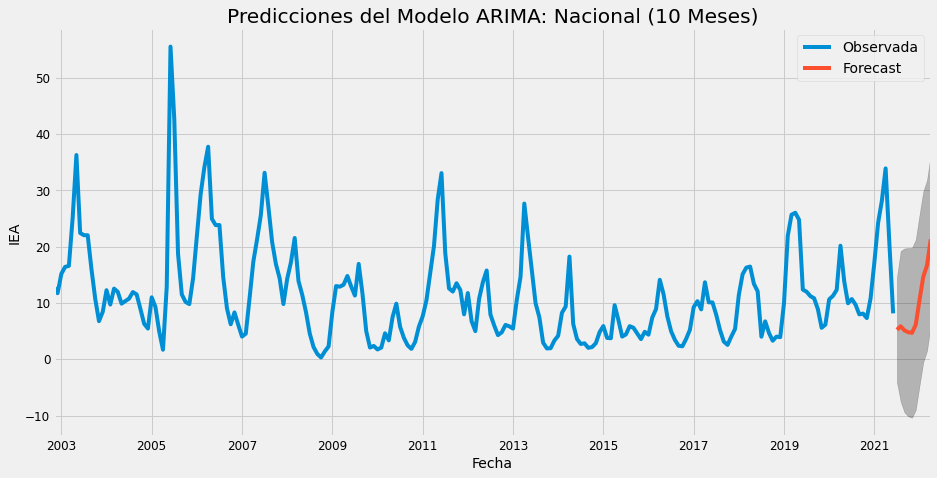

In [ ]:
pred_uc = resultados.get_forecast(steps=10)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observada', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ic.index,
                pred_ic.iloc[:, 0],
                pred_ic.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Predicciones del Modelo ARIMA: Nacional (10 Meses)')
plt.legend()
plt.show()

El modelo predice un incremento en estos valores, lo cual tiene sentido porque en los próximos 10 meses está una nueva temporada de sequía.

#### Estados


Se realizará el mismo procedimiento pero utilizando los datos de los estados más afectados por sequías y con un mayor IEA: Baja California, Sonora y Coahuila.

##### Baja California Sur

Filtramos los datos para obtener solamente los que correspondan al estado en cuestión y colocamos la fecha como índice. 

In [ ]:
df_bcs = df_completo[df_completo['Entidad']=='Baja California Sur']
cols = ['Entidad', 'Temperatura', 'Precipitacion', 'Area_total_afectada_sequias']
df_bcs.drop(cols, axis=1, inplace=True)
df_bcs.reset_index(drop=True, inplace=True)
df_bcs

,Fecha,IEA
0,2002-11-01,71.246667
1,2002-12-01,75.729000
2,2003-01-01,77.735667
3,2003-02-01,96.666667
4,2003-03-01,100.000000
...,...,...
219,2021-02-01,33.333333
220,2021-03-01,32.777667
221,2021-04-01,29.166500
222,2021-05-01,29.166500


In [ ]:
df_bcs = df_bcs.set_index('Fecha')
df_bcs.index

DatetimeIndex(['2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01',
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01',
               ...
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=224, freq=None)

In [ ]:
serie_BCS = pd.Series(df_bcs['IEA'])

Graficamos la serie de tiempo para Baja California Sur:

Text(0.5, 1.0, 'Índice de Estrés Agrícola: Baja California Sur (2002-2021)')

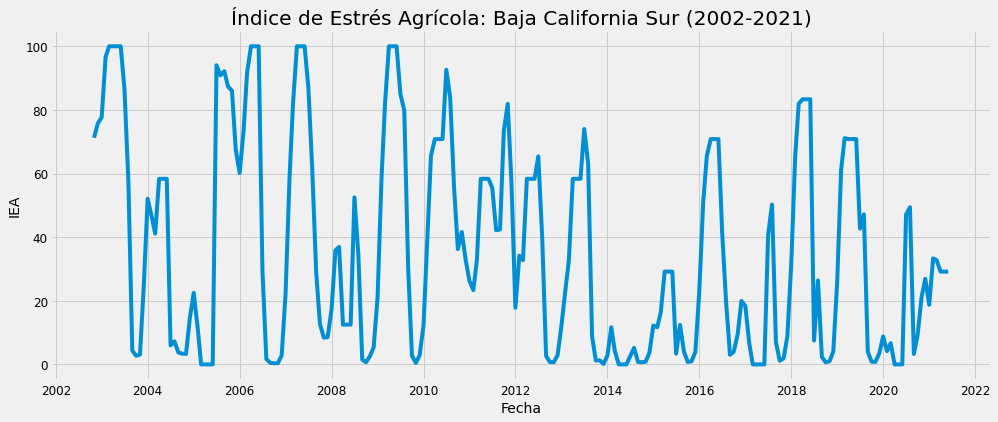

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x=serie_BCS.index, y=serie_BCS)
ax.set_title('Índice de Estrés Agrícola: Baja California Sur (2002-2021)')

Obtenemos los parámetros adecuados del modelo para el modelo ARIMA. 

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(serie_BCS,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2366.0024202916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2169.086973987464
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2182.9439179764167
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1940.3707078528835
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2134.462227171392
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2035.8572266628048
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2016.0737413952538
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1936.2146209753828
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2145.0599805853944
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1984.6397140830163
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2021.8543134954648
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1784.5580071848876
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1973.3619106982205
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1879.0193180554327
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1869.3663542686036
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1781.7256222787514
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1940.648239950624
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1836.244173615205

Ajustamos el modelo con lo mejores parámetros: `ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1688.895826178917`.

In [ ]:
mod_BCS = sm.tsa.statespace.SARIMAX(serie_BCS,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultados_BCS = mod_BCS.fit()
print(resultados_BCS.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7648      0.056     13.617      0.000       0.655       0.875
ma.L1          0.2488      0.082      3.051      0.002       0.089       0.409
ma.S.L12      -1.0000    481.773     -0.002      0.998    -945.258     943.258
sigma2       248.7928    1.2e+05      0.002      0.998   -2.35e+05    2.35e+05


Graficamos los resultados obtenidos por el modelo:

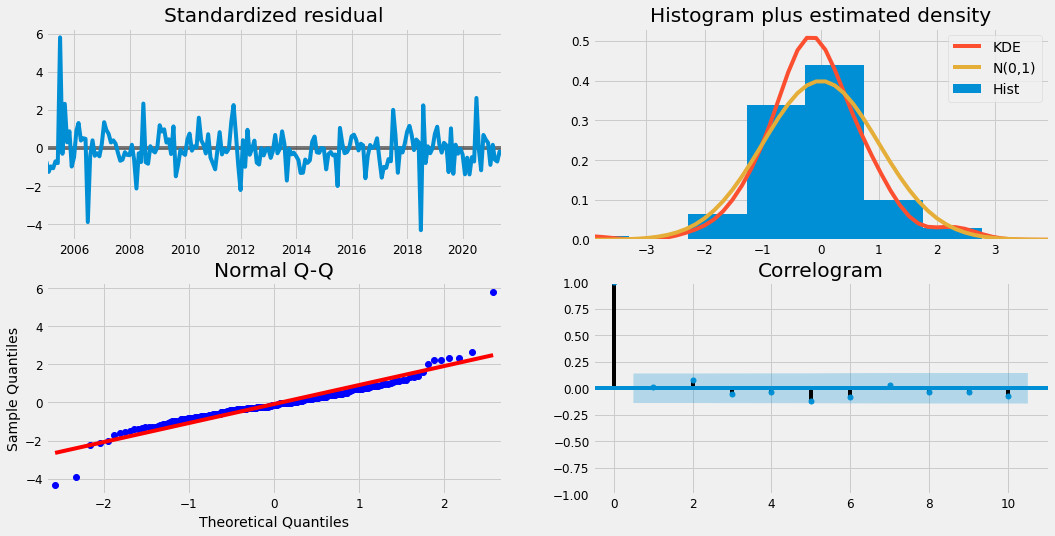

In [ ]:
resultados_BCS.plot_diagnostics(figsize=(16, 8))
plt.show()

Graficamos el ajuste del modelo:

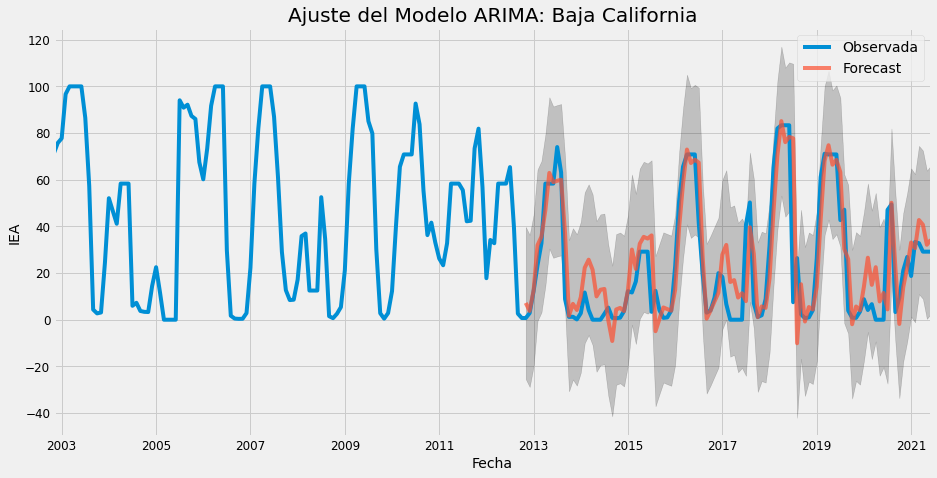

In [ ]:
pred_BCS = resultados_BCS.get_prediction(start=pd.to_datetime('2012-11-01'), dynamic=False)
pred_ic_BCS = pred_BCS.conf_int()
ax = serie_BCS['2002':].plot(label='Observada')
pred_BCS.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ic_BCS.index,
                pred_ic_BCS.iloc[:, 0],
                pred_ic_BCS.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Ajuste del Modelo ARIMA: Baja California')
plt.legend()
plt.show()


In [ ]:
y_forecasted_BCS = pred_BCS.predicted_mean
y_truth_BCS = serie_BCS['2012-11-01':]
mse = ((y_forecasted_BCS - y_truth_BCS) ** 2).mean()
print('Error Cuadrático Medio  del modelo: {}'.format(round(mse, 2)))

Error Cuadrático Medio  del modelo: 213.63


In [ ]:
print('Raíz del Error Cuadrático Medio del Modelo: {}'.format(round(np.sqrt(mse), 2)))

Raíz del Error Cuadrático Medio del Modelo: 14.62


##### Predicción a futuro

Realizamos predicciones a 10 meses:

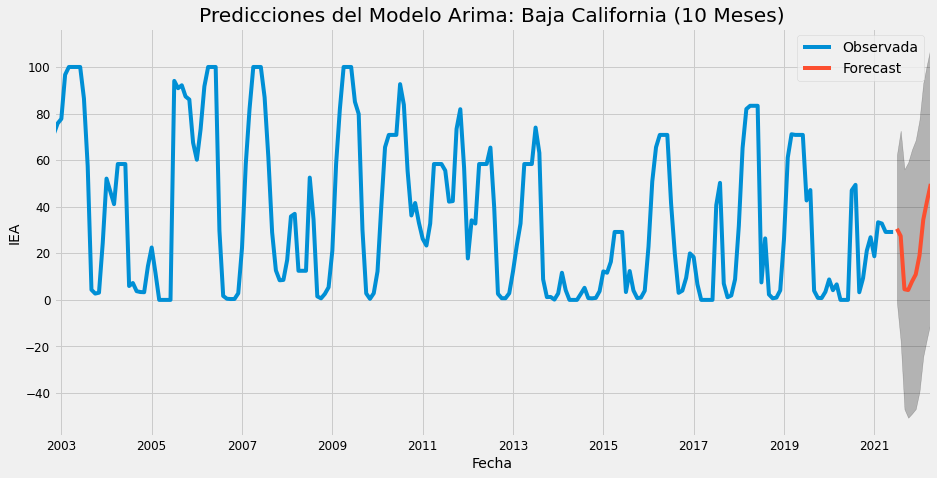

In [ ]:
pred_uc_BCS = resultados_BCS.get_forecast(steps=10)
pred_ic_BCS = pred_uc_BCS.conf_int()
ax = serie_BCS.plot(label='Observada', figsize=(14, 7))
pred_uc_BCS.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ic_BCS.index,
                pred_ic_BCS.iloc[:, 0],
                pred_ic_BCS.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Predicciones del Modelo Arima: Baja California (10 Meses)')
plt.legend()
plt.show()

##### Sonora

In [ ]:
df_sonora = df_completo[df_completo['Entidad']=='Sonora']
cols = ['Entidad', 'Temperatura', 'Precipitacion', 'Area_total_afectada_sequias']
df_sonora.drop(cols, axis=1, inplace=True)
df_sonora.reset_index(drop=True, inplace=True)
df_sonora

,Fecha,IEA
0,2002-11-01,46.916000
1,2002-12-01,22.554667
2,2003-01-01,38.018333
3,2003-02-01,20.966333
4,2003-03-01,9.612667
...,...,...
219,2021-02-01,17.664667
220,2021-03-01,14.631333
221,2021-04-01,32.768333
222,2021-05-01,62.036333


In [ ]:
df_sonora = df_sonora.set_index('Fecha')
df_sonora.index

DatetimeIndex(['2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01',
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01',
               ...
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=224, freq=None)

In [ ]:
serie_sonora = pd.Series(df_sonora['IEA'])

Text(0.5, 1.0, 'Índice de Estrés Agrícola: Sonora (2002-2021)')

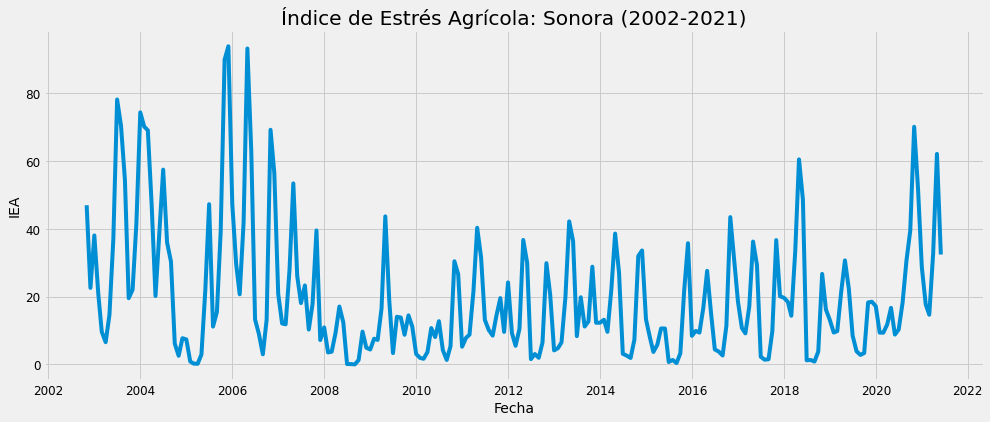

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x=serie_sonora.index, y=serie_sonora)
ax.set_title('Índice de Estrés Agrícola: Sonora (2002-2021)')

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(serie_sonora,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2114.2401636098284
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1929.5931370008589
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1906.9526624805637
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1716.7281982733575
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1876.8183421734402
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1825.3071920969182
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1746.782837787414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1717.2316947780514
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1922.5004026483725
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1751.152031411351
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1743.229258026759
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1577.4459788683412
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1716.1369280984327
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1670.5418175885047
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1619.9313781694987
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1573.8971927034006
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1870.8477905102977
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1714.932575343

In [ ]:
mod_sonora = sm.tsa.statespace.SARIMAX(serie_sonora,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultados_sonora = mod_sonora.fit()
print(resultados_sonora.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4624      0.055      8.362      0.000       0.354       0.571
ma.L1          0.5321      0.064      8.291      0.000       0.406       0.658
ar.S.L12       0.1965      0.073      2.706      0.007       0.054       0.339
ma.S.L12      -1.0000   1119.741     -0.001      0.999   -2195.651    2193.651
sigma2       118.7195   1.33e+05      0.001      0.999    -2.6e+05    2.61e+05


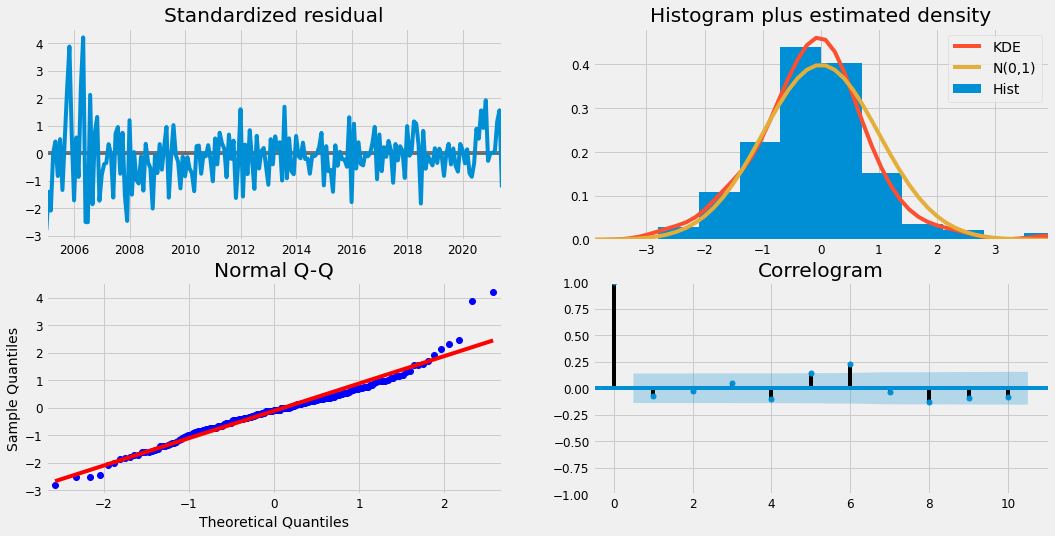

In [ ]:
resultados_sonora.plot_diagnostics(figsize=(16, 8))
plt.show()

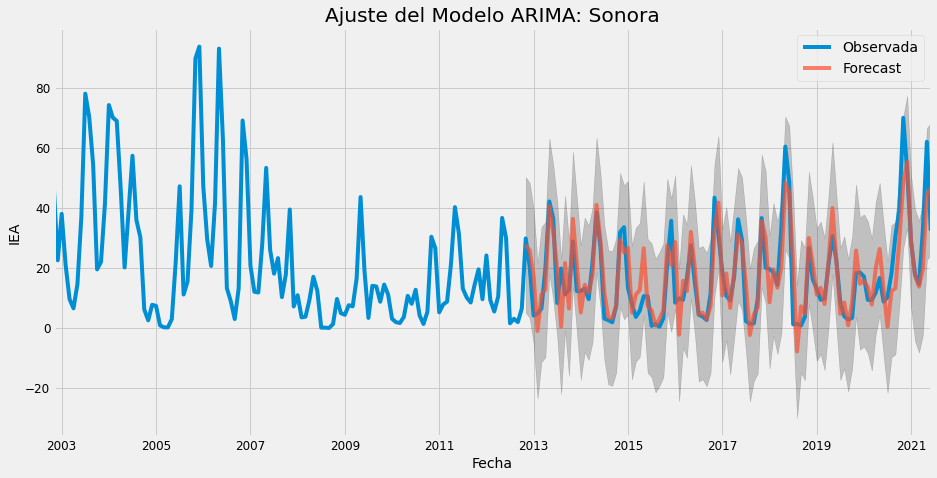

In [ ]:
pred_sonora = resultados_sonora.get_prediction(start=pd.to_datetime('2012-11-01'), dynamic=False)
pred_ic_sonora = pred_sonora.conf_int()
ax = serie_sonora['2002':].plot(label='Observada')
pred_sonora.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ic_sonora.index,
                pred_ic_sonora.iloc[:, 0],
                pred_ic_sonora.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Ajuste del Modelo ARIMA: Sonora')
plt.legend()
plt.show()


In [ ]:
y_forecasted_sonora = pred_sonora.predicted_mean
y_truth_sonora = serie_sonora['2012-11-01':]
mse = ((y_forecasted_sonora - y_truth_sonora) ** 2).mean()
print('Error Cuadrático Medio  del modelo: {}'.format(round(mse, 2)))

Error Cuadrático Medio  del modelo: 64.63


In [ ]:
print('Raíz del Error Cuadrático Medio del Modelo: {}'.format(round(np.sqrt(mse), 2)))

Raíz del Error Cuadrático Medio del Modelo: 8.04


##### Predicción a futuro

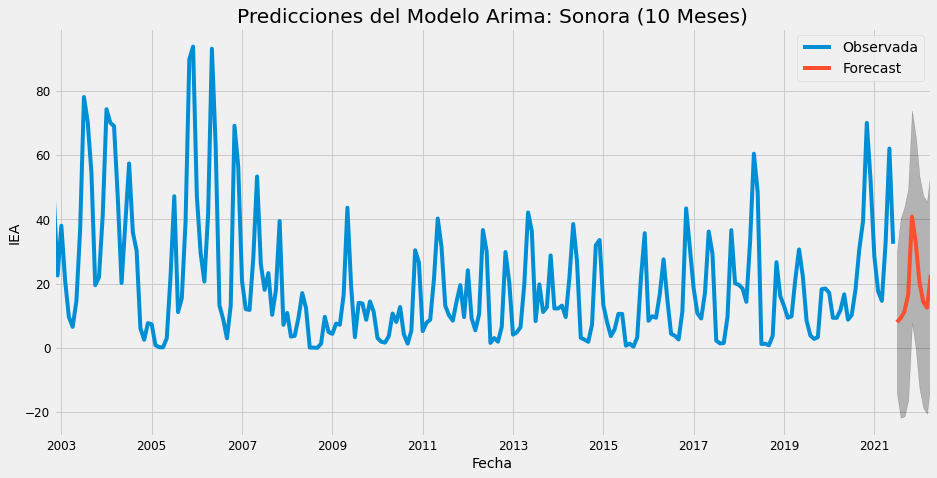

In [ ]:
pred_uc_sonora = resultados_sonora.get_forecast(steps=10)
pred_ic_sonora = pred_uc_sonora.conf_int()
ax = serie_sonora.plot(label='Observada', figsize=(14, 7))
pred_uc_sonora.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ic_sonora.index,
                pred_ic_sonora.iloc[:, 0],
                pred_ic_sonora.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Predicciones del Modelo Arima: Sonora (10 Meses)')
plt.legend()
plt.show()

##### Coahuila

In [ ]:
df_coahuila = df_completo[df_completo['Entidad']=='Coahuila']
cols = ['Entidad', 'Temperatura', 'Precipitacion', 'Area_total_afectada_sequias']
df_coahuila.drop(cols, axis=1, inplace=True)
df_coahuila.reset_index(drop=True, inplace=True)
df_coahuila

,Fecha,IEA
0,2002-11-01,60.197333
1,2002-12-01,36.920667
2,2003-01-01,26.078667
3,2003-02-01,7.746667
4,2003-03-01,5.686667
...,...,...
219,2021-02-01,47.206000
220,2021-03-01,65.260000
221,2021-04-01,84.044333
222,2021-05-01,50.065667


In [ ]:
df_coahuila = df_coahuila.set_index('Fecha')
df_coahuila.index

DatetimeIndex(['2002-11-01', '2002-12-01', '2003-01-01', '2003-02-01',
               '2003-03-01', '2003-04-01', '2003-05-01', '2003-06-01',
               '2003-07-01', '2003-08-01',
               ...
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=224, freq=None)

In [ ]:
serie_coahuila = pd.Series(df_coahuila['IEA'])

Text(0.5, 1.0, 'Índice de Estrés Agrícola: Coahuila (2002-2021)')

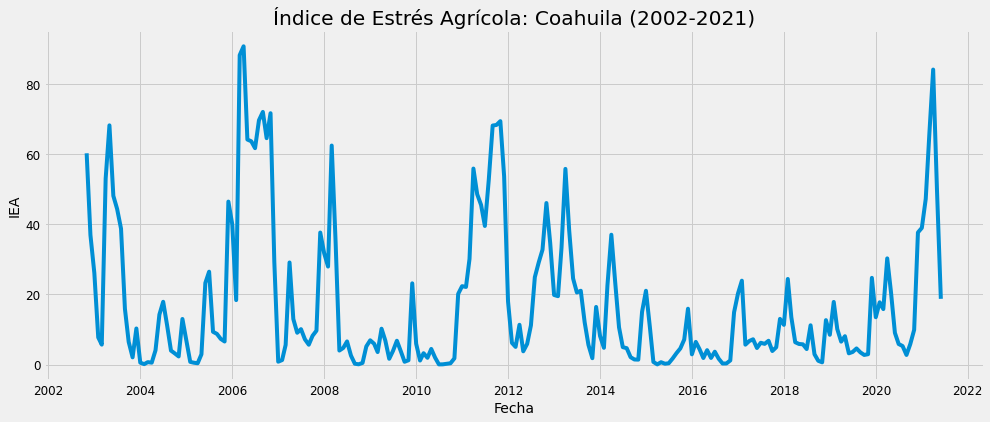

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(x=serie_coahuila.index, y=serie_coahuila)
ax.set_title('Índice de Estrés Agrícola: Coahuila (2002-2021)')

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(serie_coahuila,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2097.4290579096314
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1950.8031725628844
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2002.4454283153314
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1790.7140270636253
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1944.2806016613772
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1896.3459168030026
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1855.2499214894704
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1792.5047400273534
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1889.207069338625
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1760.8381166872132
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1808.1619656000557
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1614.156631161065
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1761.9970699693317
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1715.958919705804
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1672.2734776822808
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1616.3388108299387
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1755.1504913160452
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1645.414421529

In [ ]:
mod_coahuila = sm.tsa.statespace.SARIMAX(serie_coahuila,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
resultados_coahuila = mod_coahuila.fit()
print(resultados_coahuila.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7508      0.051     14.730      0.000       0.651       0.851
ma.L1          0.3507      0.102      3.445      0.001       0.151       0.550
ar.S.L12      -0.1536      0.065     -2.372      0.018      -0.281      -0.027
ma.S.L12      -0.8022      0.062    -13.041      0.000      -0.923      -0.682
sigma2       121.6371      7.975     15.252      0.000     106.006     137.268


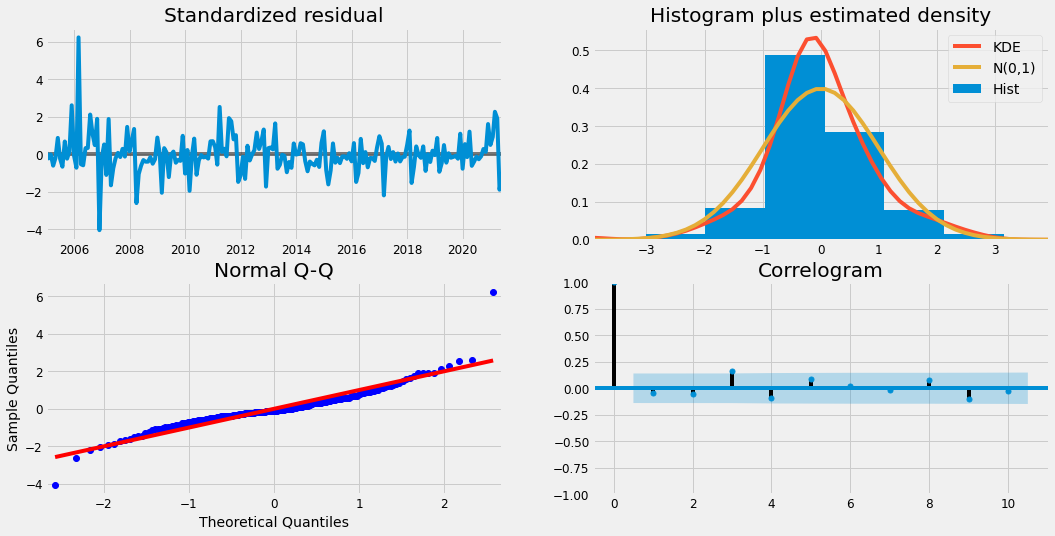

In [ ]:
resultados_coahuila.plot_diagnostics(figsize=(16, 8))
plt.show()

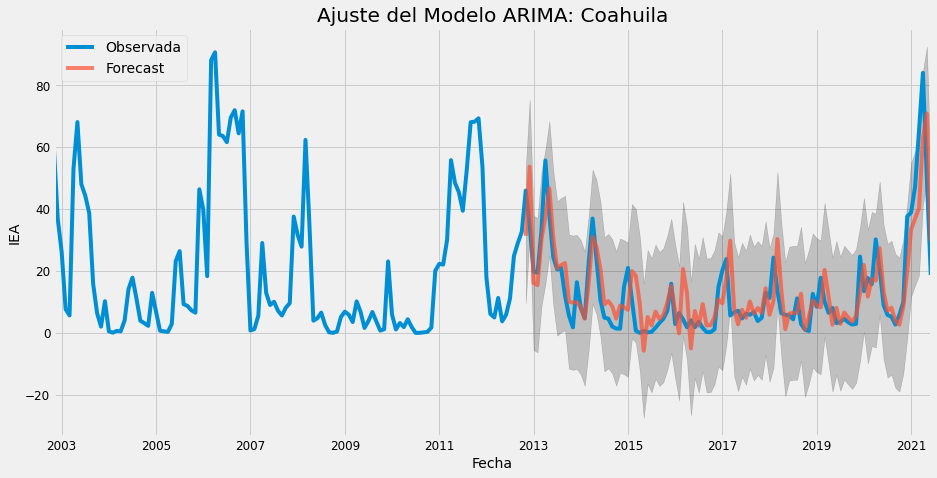

In [ ]:
pred_coahuila = resultados_coahuila.get_prediction(start=pd.to_datetime('2012-11-01'), dynamic=False)
pred_ic_coahuila = pred_coahuila.conf_int()
ax = serie_coahuila['2002':].plot(label='Observada')
pred_coahuila.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ic_coahuila.index,
                pred_ic_coahuila.iloc[:, 0],
                pred_ic_coahuila.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Ajuste del Modelo ARIMA: Coahuila')
plt.legend()
plt.show()

In [ ]:
y_forecasted_coahuila = pred_coahuila.predicted_mean
y_truth_coahuila = serie_coahuila['2012-11-01':]
mse = ((y_forecasted_coahuila - y_truth_coahuila) ** 2).mean()
print('Error Cuadrático Medio  del modelo: {}'.format(round(mse, 2)))

Error Cuadrático Medio  del modelo: 72.65


In [ ]:
print('Raíz del Error Cuadrático Medio del Modelo: {}'.format(round(np.sqrt(mse), 2)))

Raíz del Error Cuadrático Medio del Modelo: 8.52


##### Predicción a futuro

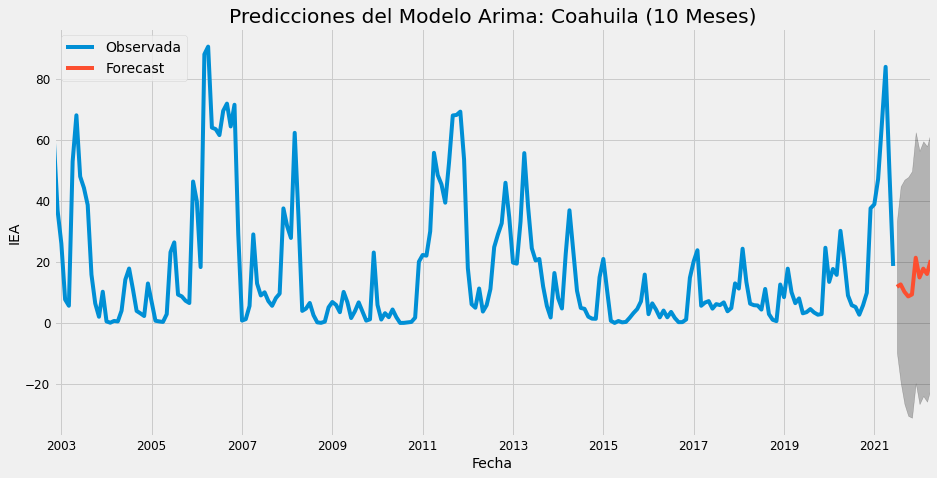

In [ ]:
pred_uc_coahuila = resultados_coahuila.get_forecast(steps=10)
pred_ic_coahuila = pred_uc_coahuila.conf_int()
ax = serie_coahuila.plot(label='Observada', figsize=(14, 7))
pred_uc_coahuila.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ic_coahuila.index,
                pred_ic_coahuila.iloc[:, 0],
                pred_ic_coahuila.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('IEA')
ax.set_title('Predicciones del Modelo Arima: Coahuila (10 Meses)')
plt.legend()
plt.show()